<a href="https://colab.research.google.com/github/sumithra28thiru/AI-COMMUNICATION-ASSISTED-/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 40.0 MB/s eta 0:00:00


In [ ]:

#lab 4 nlp speech recognization

In [36]:
from google.colab import files
import speech_recognition as sr

# Step 1: Upload the audio file
uploaded = files.upload()

# Step 2: Install SpeechRecognition library (if needed)
# !pip install SpeechRecognition  # Uncomment if you haven't installed it yet

# Initialize recognizer
recognizer = sr.Recognizer()

def recognize_from_file(audio_file):
    try:
        with sr.AudioFile(audio_file) as source:
            audio = recognizer.record(source)  # Read the entire audio file
            text = recognizer.recognize_google(audio)  # Recognize speech using Google Web Speech API
            print(f"You said: {text}")  # Print the recognized text
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except sr.UnknownValueError:
        print("Sorry, I couldn't understand the audio.")
    except sr.RequestError:
        print("Could not request results from the speech recognition service.")

# Call the function with the uploaded audio file
for filename in uploaded.keys():
    print(f"Recognizing speech from: {filename}")
    recognize_from_file(filename)


Saving WhatsApp Audio 2024-10-20 at 12.26.01 PM.wav to WhatsApp Audio 2024-10-20 at 12.26.01 PM (2).wav
Recognizing speech from: WhatsApp Audio 2024-10-20 at 12.26.01 PM (2).wav
You said: hello hi everyone


In [ ]:
#lab 3 chest x-ray

In [ ]:
pip install tensorflow opencv-python numpy matplotlib scikit-learn


Saving COVID-20.png to COVID-20 (2).png
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 856ms/step - loss: 0.6943
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.6928
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.6921
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 821ms/step - loss: 0.6909
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 855ms/step - loss: 0.6889
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.6869
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.6855
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 845ms/step - loss: 0.6843
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.6834
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 954ms/step - loss: 0.6825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


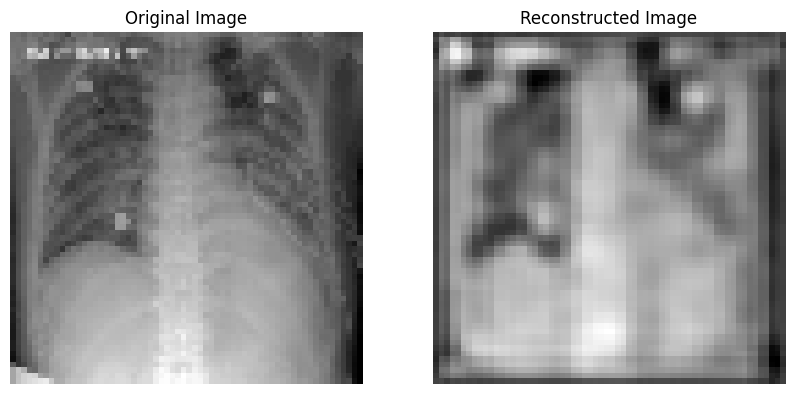

The image is considered anomalous.


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files

# Step 1: Upload the image file
uploaded = files.upload()

# Step 2: Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (64, 64))  # Resize to match the model input
    img = img.astype('float32') / 255.0  # Normalize
    return img.reshape(1, 64, 64, 1)  # Reshape for the model

# Load and preprocess the X-ray image
input_image = load_and_preprocess_image(image_path)

# Step 3: Define and compile the autoencoder architecture
input_img = keras.Input(shape=(64, 64, 1))
encoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
decoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)
autoencoder = keras.Model(input_img, decoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 4: Assume you have some training data to train the autoencoder
# For this example, let's use random data. Replace this with your actual training data.
X_train = np.random.rand(1000, 64, 64, 1)  # Random data for illustration
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128)

# Step 5: Predict the reconstructed image
reconstructed_image = autoencoder.predict(input_image)

# Step 6: Calculate the anomaly score
anomaly_score = np.mean((reconstructed_image - input_image) ** 2)

# Define a threshold for anomaly detection (set this based on your training)
threshold = 0.01  # You may need to adjust this based on your model

# Determine if the image is anomalous
is_anomalous = anomaly_score > threshold

# Visualize the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image.reshape(64, 64), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.reshape(64, 64), cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.show()

# Print the anomaly detection result
if is_anomalous:
    print("The image is considered anomalous.")
else:
    print("The image is normal.")


In [ ]:
#lab 2 below code digit character recognition

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
predictions = model.predict(x_test[:2])
print(predictions)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8652 - loss: 0.4710
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9550 - loss: 0.1535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9740 - loss: 0.0857
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9775 - loss: 0.0715
313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0734
Test loss: 0.0734403058886528
Test accuracy: 0.977400004863739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[4.32093429e-07 1.03384901e-08 3.26809495e-05 3.19802712e-05
  3.98864129e-13 3.08530957e-07 7.21105372e-14 9.99933243e-01
  5.57936289e-07 7.41372048e-07]
 [1.22523325e-08 6.58077897e-06 9.99981761e-01 1.06000180e-05
  4.80672393e-15 2.23318693e-07 5.94942904e-08 7.04062416e-12
  7.77875641e-07 2.06991507e-11]]


In [ ]:
#lab 1 xor multilayer

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
# Define the XOR input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the XOR output data
Y = np.array([0, 1, 1, 0])
# Create a Sequential model
model = Sequential()
# Add an input layer
model.add(Dense(4, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training parameters
epochs = 10000
# Train the model
model.fit(X, Y, epochs=epochs, verbose=0)
# Test the trained model
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = model.predict(test_input)
print("Predicted XOR outputs:")
for i in range(len(test_input)):
 print(f"{test_input[i][0]} XOR {test_input[i][1]} = {predicted_output[i][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted XOR outputs:
0 XOR 0 = 0.0199
0 XOR 1 = 0.9887
1 XOR 0 = 0.9841
1 XOR 1 = 0.0075


In [ ]:
#lab 5 traffic sign using cnn

In [39]:
pip install opencv-python matplotlib


In [ ]:
#lab 5 traffic sign using cnn

In [47]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip
!unzip GTSRB-Training_fixed.zip


Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Training/00030/00007_00024.ppm  
  inflating: GTSRB/Training/00030/00007_00025.ppm  
  inflating: GTSRB/Training/00030/00007_00026.ppm  
  inflating: GTSRB/Training/00030/00007_00027.ppm  
  inflating: GTSRB/Training/00030/00007_00028.ppm  
  inflating: GTSRB/Training/00030/00007_00029.ppm  
  inflating: GTSRB/Training/00030/00008_00000.ppm  
  inflating: GTSRB/Training/00030/00008_00001.ppm  
  inflating: GTSRB/Training/00030/00008_00002.ppm  
  inflating: GTSRB/Training/00030/00008_00003.ppm  
  inflating: GTSRB/Training/00030/00008_00004.ppm  
  inflating: GTSRB/Training/00030/00008_00005.ppm  
  inflating: GTSRB/Training/00030/00008_00006.ppm  
  inflating: GTSRB/Training/00030/00008_00007.ppm  
  inflating: GTSRB/Training/00030/00008_00008.ppm  
  inflating: GTSRB/Training/00030/00008_00009.ppm  
  inflating: GTSRB/Training/00030/00008_00010.ppm  
  inflating: GTSRB/Training/00030/00008_00011.ppm  
  inflating: 

Epoch 1/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4929 - loss: 2.0590 - val_accuracy: 0.8849 - val_loss: 0.5138
Epoch 2/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9162 - loss: 0.3774 - val_accuracy: 0.9321 - val_loss: 0.2946
Epoch 3/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9611 - loss: 0.1838 - val_accuracy: 0.9497 - val_loss: 0.2211
Epoch 4/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9787 - loss: 0.1083 - val_accuracy: 0.9572 - val_loss: 0.1927
Epoch 5/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9858 - loss: 0.0737 - val_accuracy: 0.9533 - val_loss: 0.1942


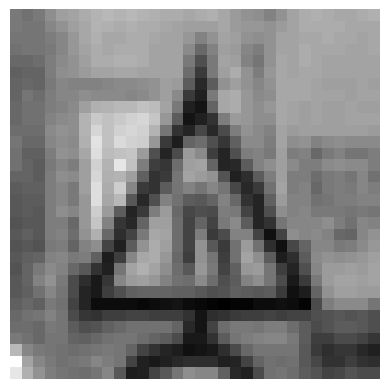

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Class: 24


In [48]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten

# Load images and labels
def load_data(classes, current_path='/content/GTSRB/Training'):
    images, labels = [], []

    for i in range(classes):
        path = os.path.join(current_path, str(i).zfill(5))
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            image = cv.imread(img_path)
            if image is not None:
                image = cv.resize(image, (32, 32))
                images.append(cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255.0)
                label = np.zeros(classes)
                label[i] = 1.0
                labels.append(label)

    return np.array(images).astype(np.float32), np.array(labels).astype(np.float32)

# Prepare dataset
classes = 43
X, y = load_data(classes)
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 32, 32, 1), y, test_size=0.2, random_state=123)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    Flatten(),
    Dense(classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Predict function
def sign_predict(image_index=0):
    image = X_test[image_index].reshape(1, 32, 32, 1)
    plt.imshow(image.reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.show()
    prediction = model.predict(image)
    print("Predicted Class:", np.argmax(prediction))

# Test prediction
sign_predict()


In [ ]:
#lab 6 fraud detection of share market data analytics tools

   user_id transaction_type  transaction_amount  is_fraud
0       52             sell         4708.153087         0
1       93             sell         8802.807654         0
2       15              buy          150.937190         0
3       72             sell         8217.474482         0
4       61              buy         2363.389099         0


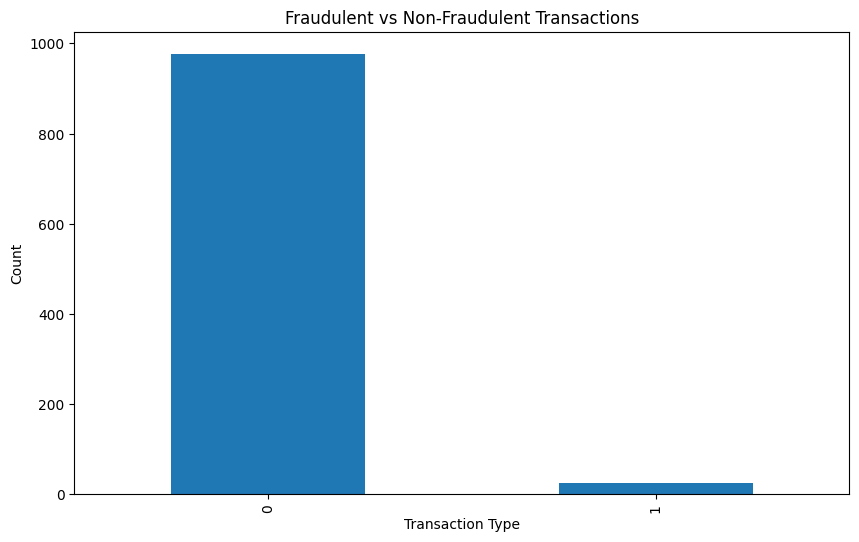

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       193
           1       0.00      0.00      0.00         7

    accuracy                           0.95       200
   macro avg       0.48      0.49      0.49       200
weighted avg       0.93      0.95      0.94       200

[[190   3]
 [  7   0]]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Generate Synthetic Dataset
def create_synthetic_data(num_samples=1000):
    np.random.seed(42)

    # Generate random user IDs
    user_ids = np.random.randint(1, 100, num_samples)

    # Generate random transaction types (buy/sell)
    transaction_types = np.random.choice(['buy', 'sell'], num_samples)

    # Generate random transaction amounts
    transaction_amounts = np.random.uniform(100, 10000, num_samples)

    # Generate fraud labels: assuming 2% of transactions are fraudulent
    is_fraud = np.random.choice([0, 1], num_samples, p=[0.98, 0.02])

    # Create a DataFrame
    data = pd.DataFrame({
        'user_id': user_ids,
        'transaction_type': transaction_types,
        'transaction_amount': transaction_amounts,
        'is_fraud': is_fraud
    })

    return data

# Create synthetic data
data = create_synthetic_data(1000)
print(data.head())

# Step 2: Data Preprocessing
data['transaction_type'] = data['transaction_type'].map({'buy': 1, 'sell': 0})  # Encode transaction types

# Step 3: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
data['is_fraud'].value_counts().plot(kind='bar')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Step 4: Feature Engineering
data['user_transaction_count'] = data.groupby('user_id')['user_id'].transform('count')

# Step 5: Model Training
X = data[['transaction_type', 'transaction_amount', 'user_transaction_count']]
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
#lab 7image augumentaion using deep RBM

Saving traffic.png to traffic.png


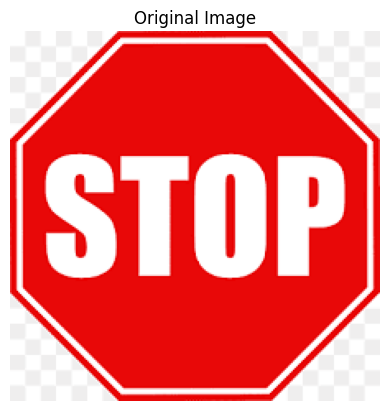

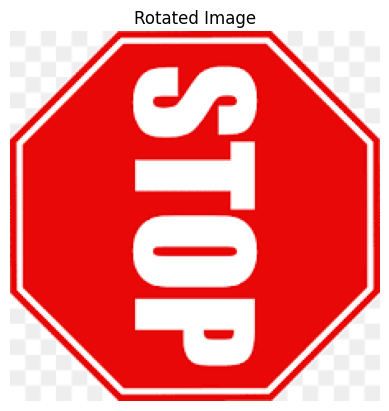

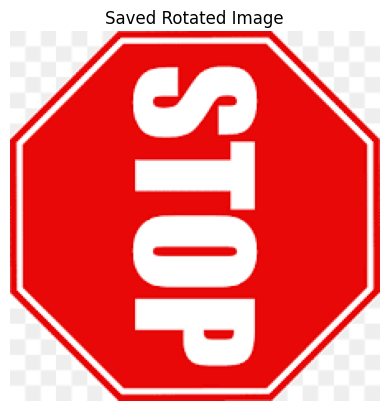

In [54]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Function to upload a file
def upload_file():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Upload the image file
image_path = upload_file()

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
else:
    # Display the original image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Rotate the image 90 degrees clockwise
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # Display the rotated image
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image')
    plt.axis('off')
    plt.show()

    # Save the rotated image
    output_path = 'rotated_image.png'  # Change as needed
    cv2.imwrite(output_path, rotated_image)

    # Load and display the saved image
    saved_image = cv2.imread(output_path)
    plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
    plt.title('Saved Rotated Image')
    plt.axis('off')
    plt.show()


In [ ]:
#LAB 8 SENTIMENT ANALYSIS USING LSTM


In [56]:
!pip install keras
!pip install tensorflow
!pip install nltk
!pip install scikit-learn


In [58]:
# prompt: pip install pandas numpy nltk scikit-learn keras

!pip install pandas numpy nltk scikit-learn keras

In [68]:
!pip install --upgrade tensorflow



In [72]:
pip install pandas nltk tensorflow scikit-learn


In [78]:
pip install numpy keras


In [81]:
pip install tensorflow


In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data (you can replace these with your own dataset)
texts = [
    "I love this product!",
    "This is the worst experience I've ever had.",
    "Absolutely fantastic service.",
    "I'm not satisfied with the quality.",
    "Will definitely recommend to my friends."
]
labels = [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative

# Parameters
max_words = 1000  # Maximum number of words to consider
max_len = 20      # Maximum length of sequences
embedding_dim = 128  # Dimension of embedding layer

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Model Definition
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64))  # LSTM layer with 64 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training (use your own data here)
history = model.fit(X, y, epochs=5, batch_size=2)

# Evaluate the model on training data (for simplicity)
loss, accuracy = model.evaluate(X, y)
print(f"Training accuracy: {accuracy:.4f}")

# Sample Prediction
sample_text = ["I am very happy with my purchase!"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_X = pad_sequences(sample_seq, maxlen=max_len)
prediction = model.predict(sample_X)
print("Sentiment (1=positive, 0=negative):", (prediction[0][0] > 0.5).astype(int))


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9000 - loss: 0.6822
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7125 - loss: 0.6772 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8375 - loss: 0.6541
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8375 - loss: 0.6450 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5500 - loss: 0.6334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.6000 - loss: 0.6106
Training accuracy: 0.6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Sentiment (1=positive, 0=negative): 1
